In [1]:
import anndata
import scipy.sparse as sp
import numpy as np
import scanpy as sc

In [2]:
def select_gene(data,\
                num_gene,\
                threshold=0,\
                atleast=10,\
                decay=1,
                xoffset=5,\
                yoffset=0.02):

    if sp.issparse(data):
        zeroRate = 1 - np.squeeze(np.array((data > threshold).mean(axis=0)))
        A = data.multiply(data > threshold)
        A.data = np.log2(A.data)
        meanExpr = np.zeros_like(zeroRate) * np.nan
        detected = zeroRate < 1
        meanExpr[detected] = np.squeeze(np.array(A[:, detected].mean(axis=0))) / (
            1 - zeroRate[detected]
        )
    else:
        zeroRate = 1 - np.mean(data > threshold, axis=0)
        meanExpr = np.zeros_like(zeroRate) * np.nan
        detected = zeroRate < 1
        meanExpr[detected] = np.nanmean(
            np.where(data[:, detected] > threshold, np.log2(data[:, detected]), np.nan),
            axis=0,
        )

    lowDetection = np.array(np.sum(data > threshold, axis=0)).squeeze() < atleast
    # lowDetection = (1 - zeroRate) * data.shape[0] < atleast - .00001
    zeroRate[lowDetection] = np.nan
    meanExpr[lowDetection] = np.nan

    if num_gene is not None:
        up = 10
        low = 0
        for t in range(100):
            nonan = ~np.isnan(zeroRate)
            selected = np.zeros_like(zeroRate).astype(bool)
            selected[nonan] = (
                zeroRate[nonan] > np.exp(-decay * (meanExpr[nonan] - xoffset)) + yoffset
            )
            if np.sum(selected) == num_gene:
                break
            elif np.sum(selected) < num_gene:
                up = xoffset
                xoffset = (xoffset + low) / 2
            else:
                low = xoffset
                xoffset = (xoffset + up) / 2
        print("Chosen offset: {:.2f}".format(xoffset))
    else:
        nonan = ~np.isnan(zeroRate)
        selected = np.zeros_like(zeroRate).astype(bool)
        selected[nonan] = (
            zeroRate[nonan] > np.exp(-decay * (meanExpr[nonan] - xoffset)) + yoffset
        )

    return selected

In [3]:
adata_lb = anndata.read_h5ad("./data_sampled/baron_2016h_labelled_0.2.h5ad")
adata_ulb = anndata.read_h5ad("./data_sampled/baron_2016h_unlabelled_0.2.h5ad")

OSError: Unable to open file (unable to open file: name = './data_sampled/baron_2016h_labelled_0.2.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
a = sc.pp.filter_genes(adata_lb, min_counts=1, inplace=False)

NameError: name 'adata_lb' is not defined

In [32]:
a[0]

array([ True,  True,  True, ...,  True,  True,  True])

In [44]:
adata_filter = adata_lb[:, a[0]]

In [38]:
adata_filter.shape

(1711, 16236)

In [45]:
adata_filter.obsm['tsne'] = np.zeros(1711)

In [48]:
adata_filter.obsm['tsne']

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
1 // 0

ZeroDivisionError: integer division or modulo by zero

In [24]:
adata_ulb.shape

(6858, 20125)

In [ ]:

select_lb = select_gene(data=adata_lb.X, num_gene=3000)
select_ulb = select_gene(data=adata_ulb.X, num_gene=3000)

In [ ]:
adata_lb_3000 = adata_lb[:,select_lb]

In [ ]:
adata_ulb_3000 = adata_ulb[:, select_ulb]

In [ ]:
adata_ulb_3000.var_names

In [ ]:
len(set(adata_lb_3000.var_names).intersection(set(adata_ulb_3000.var_names)))

# baron2016_h & Xin (human pancreas)

## data size and shape

In [7]:
dataset_pancreas = {'baron':None, 'xin': None}
dataset_pancreas['baron'] = anndata.read_h5ad("./data/baron_2016h.h5ad")
dataset_pancreas['xin'] = anndata.read_h5ad("./data/xin_2016.h5ad")

for k in dataset_pancreas.keys():
    print ("There are {} cells and {} genes in {} dataset".format(dataset_pancreas[k].shape[0],\
                                                                  dataset_pancreas[k].shape[1],\
                                                                  k))
    
    

There are 8569 cells and 20125 genes in baron dataset
There are 1492 cells and 39851 genes in xin dataset


In [ ]:
len(set(dataset_pancreas['baron'].var_names).intersection(set(dataset_pancreas['xin'].var_names)))

In [ ]:
dataset_pancreas['xin'].var_names

In [ ]:
selesct = select_genes(data=dataset_pancreas['baron'].X, n=3000, threshold=0, plot=False)

In [ ]:
1_000_000

In [ ]:
a.obs['labels'].unique().tolist()

In [ ]:
a.X.toarray().shape

## batch and cell label info

NameError: name 'dataset_pancreas' is not defined

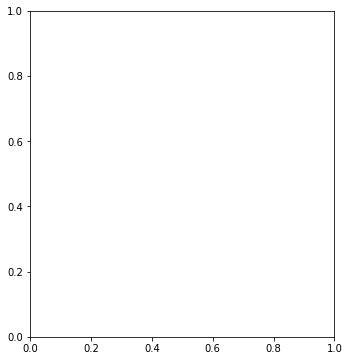

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dataset_pancreas['baron'].obs['batch_id'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
dataset_pancreas['xin'].obs['batch_id'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')

NameError: name 'dataset_pancreas' is not defined

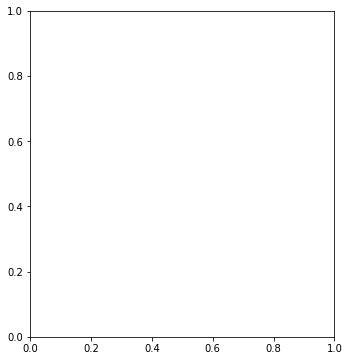

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dataset_pancreas['baron'].obs['labels'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
dataset_pancreas['xin'].obs['labels'].value_counts().plot(kind='bar')

# Hrvatin and Chen (Mouse Brain)

In [8]:
dataset_mouse_brain = {'hrvatin':None, 'chen': None}
dataset_mouse_brain['hrvatin'] = anndata.read_h5ad("./data/hrvatin_2018.h5ad")
dataset_mouse_brain['chen'] = anndata.read_h5ad("./data/chen_2017.h5ad")

for k in dataset_mouse_brain.keys():
    print ("There are {} cells and {} genes in {} dataset".format(dataset_mouse_brain[k].shape[0],\
                                                                  dataset_mouse_brain[k].shape[1],\
                                                                  k))

There are 48266 cells and 25186 genes in hrvatin dataset
There are 14437 cells and 23284 genes in chen dataset


## batch and cell label info

(array([0]), <a list of 1 Text xticklabel objects>)

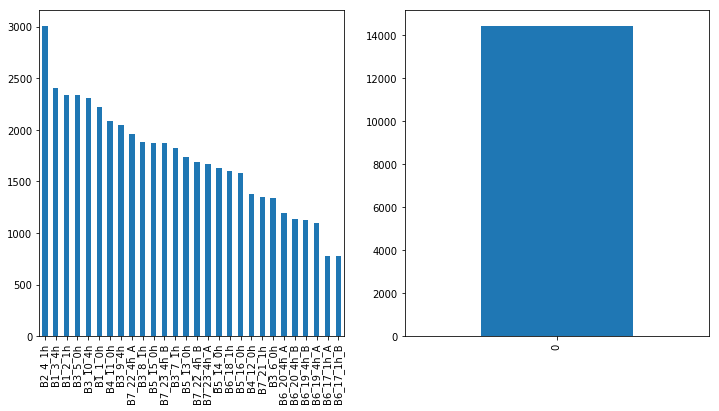

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dataset_mouse_brain['hrvatin'].obs['batch_id'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
dataset_mouse_brain['chen'].obs['batch_id'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')

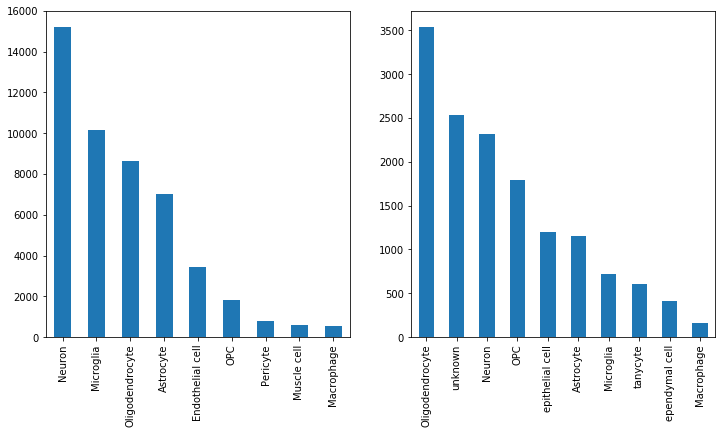

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dataset_mouse_brain['hrvatin'].obs['labels'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
dataset_mouse_brain['chen'].obs['labels'].value_counts().plot(kind='bar')

# Macosko and Shekhar (Mouse Retina)

In [8]:
import matplotlib.pyplot as plt
dataset_mouse_retina = {'macosko':None, 'shekhar': None}
dataset_mouse_retina['macosko'] = anndata.read_h5ad("./data/macosko_2015.h5ad")
dataset_mouse_retina['shekhar'] = anndata.read_h5ad("./data/shekhar_2016.h5ad")

for k in dataset_mouse_retina.keys():
    print ("There are {} cells and {} genes in {} dataset".format(dataset_mouse_retina[k].shape[0],\
                                                                  dataset_mouse_retina[k].shape[1],\
                                                                  k))

There are 44808 cells and 24658 genes in macosko dataset
There are 26830 cells and 24903 genes in shekhar dataset


(array([0, 1]), <a list of 2 Text xticklabel objects>)

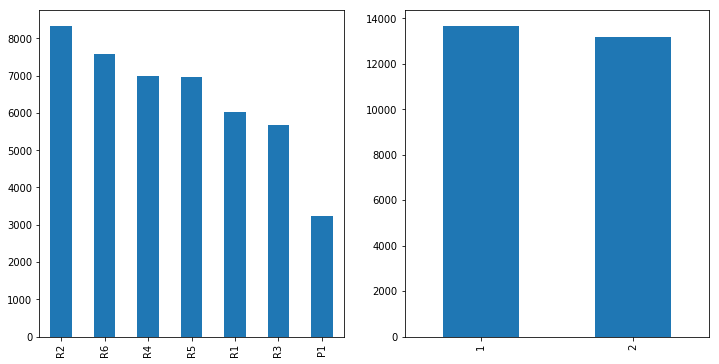

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dataset_mouse_retina['macosko'].obs['batch_id'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
dataset_mouse_retina['shekhar'].obs['batch_id'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')

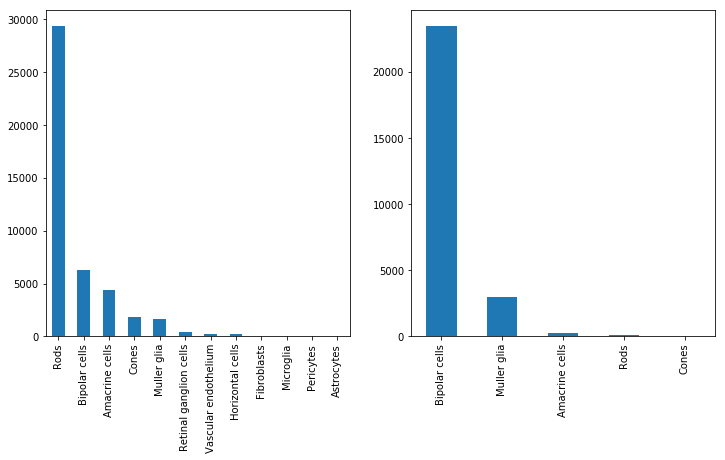

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dataset_mouse_retina['macosko'].obs['labels'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
dataset_mouse_retina['shekhar'].obs['labels'].value_counts().plot(kind='bar')